In [2]:
import pandas as pd
import json

data = {
    'min_valid_length': [],
    'min_valid_percent': [],
    'pred_length': []
}

with open('judged_datasets/HuggingFaceH4/MATH-500.jsonl', 'r', encoding='utf-8') as f:
    for line in f:
        line_data = json.loads(line)
        data['min_valid_length'].append(line_data['min_valid_length'])
        data['min_valid_percent'].append(line_data['min_valid_percent'])
        data['pred_length'].append(line_data['pred_length'])

df = pd.DataFrame(data)


print(df.describe())

print(list(df['pred_length']))


       min_valid_length  min_valid_percent
count        149.000000         149.000000
mean        3028.476510          43.550336
std         6404.572198          35.975486
min            4.000000           1.000000
25%          106.000000          13.000000
50%          603.000000          35.000000
75%         1638.000000          79.000000
max        31147.000000         100.000000
[18, 18, 15, 13, 18, 25, 10, 10, 120, 75, 55, 120, 12, 75, 60, 60, 25, 25, 45, 50, 25, 20, 12, 15, 12, 120, 10, 20, 120, 18, 10, 75, 60, 25, 20, 25, 25, 15, 15, 25, 45, 18, 18, 5, 15, 5, 20, 10, 25, 25, 6, 50, 25, 18, 25, 50, 5, 25, 11, 150, 50, 120, 10, 18, 14, 20, 50, 25, 25, 120, 60, 15, 25, 25, 15, 15, 75, 25, 150, 18, 60, 10, 25, 18, 25, 25, 20, 120, 10, 60, 60, 60, 18, 15, 25, 50, 25, 150, 18, 25, 40, 120, '', '', 12, 60, '', '', 15, 12, 50, 25, 60, 7, '', '', '', '', 12, 8, 50, 15, 25, 75, 60, 12, 25, 25, 18, 120, 150, 25, 15, 23, 75, 75, 60, 15, 15, 60, 10, 150, 75, 35, 75, 150, 12, 40, 75]


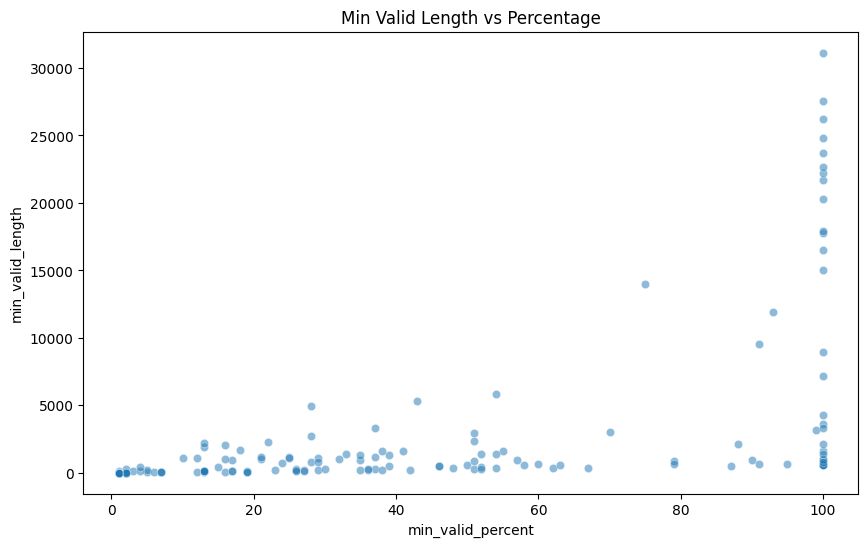

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='min_valid_percent', y='min_valid_length', alpha=0.5)
plt.title('Min Valid Length vs Percentage')
plt.show()

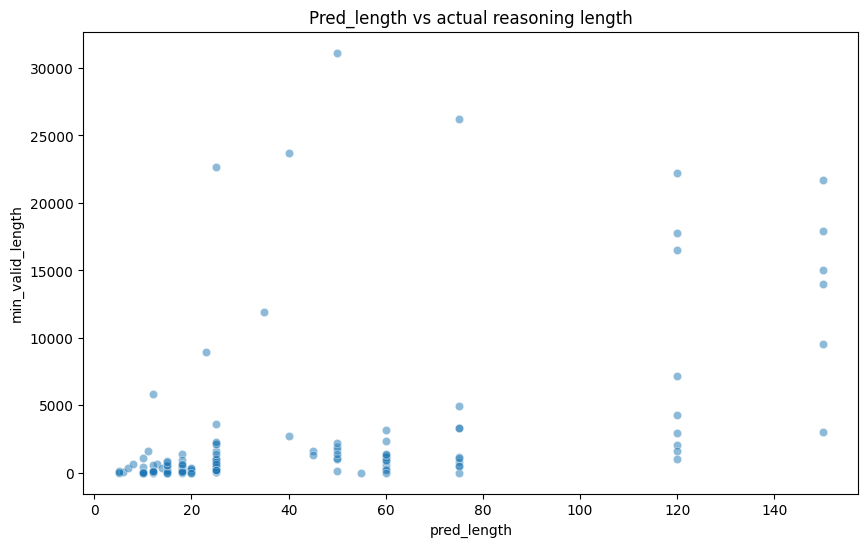

In [13]:
df_clean = df[df['pred_length'] != ""].copy()
df_clean['pred_length'] = df_clean['pred_length'].astype(int)
df2 = df_clean.copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='pred_length', y='min_valid_length', alpha=0.5)
plt.title('Pred_length vs actual reasoning length')
plt.show()

In [5]:
alpha = 0.3
q = (1-alpha)*(1+1.0/len(df))
print(q)

q_l = df['min_valid_length'].quantile(q)
q_p = df['min_valid_percent'].quantile(q)
print(q_l)
print(q_p)



0.7046979865771812
1360.5906040268455
58.590604026845625


In [ ]:
from datasets import load_dataset
from tools.data_collect import Data_Processor,setup_output_file
from tools.data_judge import ReasoningOptimizer
import json
import os
import numpy as np
from pathlib import Path
# script_dir = os.path.dirname(os.path.abspath(__file__))
judge_config_path = "configs\judge_config.json"

with open(judge_config_path, 'r', encoding='utf-8') as f:
    judge_config = json.load(f)
judged_output = "judged_datasets/test__t.jsonl"
optimizer = ReasoningOptimizer(judge_config,output_path=judged_output)
optimizer.load_data("reasoning_datasets/HuggingFaceH4/test.jsonl")
optimizer.run_optimization()
